**LAB 09 <br>Exploring mlp classifier**

In [ ]:
from google.colab import files
 
uploaded = files.upload()

Saving accident-2014-4.csv to accident-2014-4.csv


In [ ]:
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
%matplotlib inline
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

df = pd.read_csv(io.BytesIO(uploaded['accident-2014-4.csv']))
print(df.head().to_markdown())

|    | Reference Number   |   Grid Ref: Easting |   Grid Ref: Northing |   Number of Vehicles | Accident Date   |   Time (24hr) |   1st Road Class | 1st Road Class & No   |   Road Surface |   Lighting Conditions |   Weather Conditions | Local Authority   |   Casualty Class |   Casualty Severity |   Sex of Casualty |   Age of Casualty |   Vehicle Number |   Type of Vehicle |
|---:|:-------------------|--------------------:|---------------------:|---------------------:|:----------------|--------------:|-----------------:|:----------------------|---------------:|----------------------:|---------------------:|:------------------|-----------------:|--------------------:|------------------:|------------------:|-----------------:|------------------:|
|  0 | 11S0281            |              407491 |               428929 |                    1 | 28-01-2014      |           835 |                6 | U                     |              2 |                     1 |                    9 | Calderdal

Index(['Number of Vehicles', 'Road Surface', 'Lighting Conditions',
       'Weather Conditions', 'Sex of Casualty', 'Age of Casualty',
       'Type of Vehicle', 'Casualty Severity'],
      dtype='object')

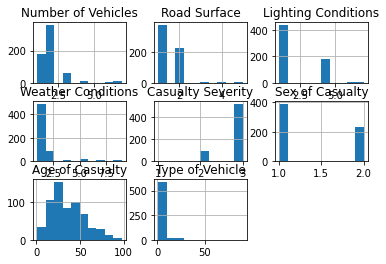

In [ ]:
#Drop the columns with the non numerical values.
df1 = df
num_df =df1.drop(['Grid Ref: Easting', 'Grid Ref: Northing','Reference Number','Accident Date','Time (24hr)', '1st Road Class','Casualty Class', '1st Road Class & No','Vehicle Number','Local Authority'], axis=1)
num_df.columns
num_df.hist()

# Bring the class attribute as the last column
# The casulaty Severity here has 3 values.. 1.Fatal, 2.Seriuos . 3.Slight

temp_series = num_df.pop('Casualty Severity')
num_df['Casualty Severity'] = temp_series
num_df.columns

In [ ]:
# importing the sklearn library
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
# getting the x(dataset excluding the class attribute) and y(class attribute) dataset from class data set
x = num_df.drop('Casualty Severity',axis=1)
y = num_df['Casualty Severity']

X_train, X_test, y_train, y_test= train_test_split(x, y, test_size= 0.25)

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(100,),random_state=1, max_iter=300).fit(X_train, y_train)
clf.fit(X_train,y_train)
y_pred = clf.predict_proba(X_train)
print('Overall AUC:', roc_auc_score(y_train, clf.predict_proba(X_train),multi_class="ovr"))

Overall AUC: 0.8485003047881352


In [ ]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[  0,   0,   1],
       [  0,   1,  27],
       [  0,   2, 125]])

In [ ]:
import seaborn as seaborn 
import matplotlib.pyplot as plt


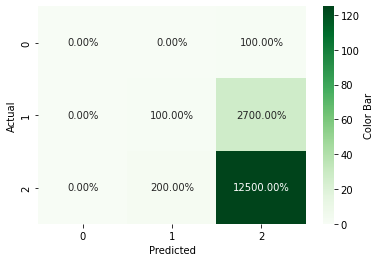

In [ ]:
sns.heatmap(cm, cmap="Greens", annot=True,fmt='.2%',
            cbar_kws={'orientation':'vertical', 'label':'Color Bar'})
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

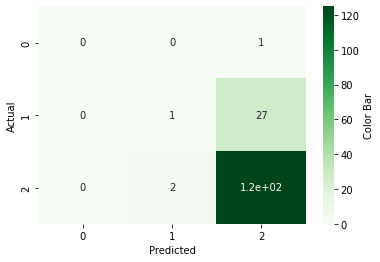

In [ ]:
sns.heatmap(cm, cmap="Greens", annot=True,
            cbar_kws={'orientation':'vertical', 'label':'Color Bar'})
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
clf.predict_proba(X_test)
print('')

In [ ]:
clf.score(X_test, y_test)

0.8589743589743589

In [ ]:
score = clf.score(X_train,y_train)

In [ ]:
score

0.867237687366167

In [ ]:
activationList = ["relu", "identity", "logistic", "tanh"]
for i in range(0,4):
  clf = MLPClassifier(activation = activationList[i]);
  clf.fit(X_train, y_train);
  tempscore = clf.score(X_train, y_train)
  print("Activation function -",activationList[i],"- Accuracy : ",tempscore)

Activation function - relu - Accuracy :  0.8586723768736617
Activation function - identity - Accuracy :  0.8522483940042827
Activation function - logistic - Accuracy :  0.8522483940042827
Activation function - tanh - Accuracy :  0.860813704496788
